# TrainBaseModel.ipynb

This notebook trains a baseline convolutional neural network (CNN) to classify images from a 5-class subset of the Fruits 360 dataset.  
The model will be saved for comparison with future models using data augmentation and transfer learning.


In [ ]:
from google.colab import files
#files.upload()  # Upload fruit_subset_100.zip again


In [ ]:
import zipfile

with zipfile.ZipFile("fruit_subset_100.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/fruit_subset_100")


In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/fruit_subset_100",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/fruit_subset_100",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 500 files belonging to 5 classes.
Using 400 files for training.
Found 500 files belonging to 5 classes.
Using 100 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


## Define Baseline CNN Model

We use a simple convolutional model with two convolutional layers and one dense output layer.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 471ms/step - accuracy: 1.0000 - loss: 2.0417e-09 - val_accuracy: 1.0000 - val_loss: 1.1921e-08
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 479ms/step - accuracy: 1.0000 - loss: 3.8075e-09 - val_accuracy: 1.0000 - val_loss: 1.1921e-08
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 392ms/step - accuracy: 1.0000 - loss: 3.0770e-09 - val_accuracy: 1.0000 - val_loss: 1.1921e-08
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 373ms/step - accuracy: 1.0000 - loss: 4.1440e-09 - val_accuracy: 1.0000 - val_loss: 1.0729e-08
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 463ms/step - accuracy: 1.0000 - loss: 1.3215e-09 - val_accuracy: 1.0000 - val_loss: 1.0729e-08
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 394ms/step - accuracy: 1.0000 - loss: 2.7704e-09 - val_accuracy: 1.0000 - val_loss: 1.0729e-08
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 444ms/step - accuracy: 1.0000 - loss: 8.3996e-10 - val_accuracy: 1.0000 - val_loss: 1.0729e-08
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 497m

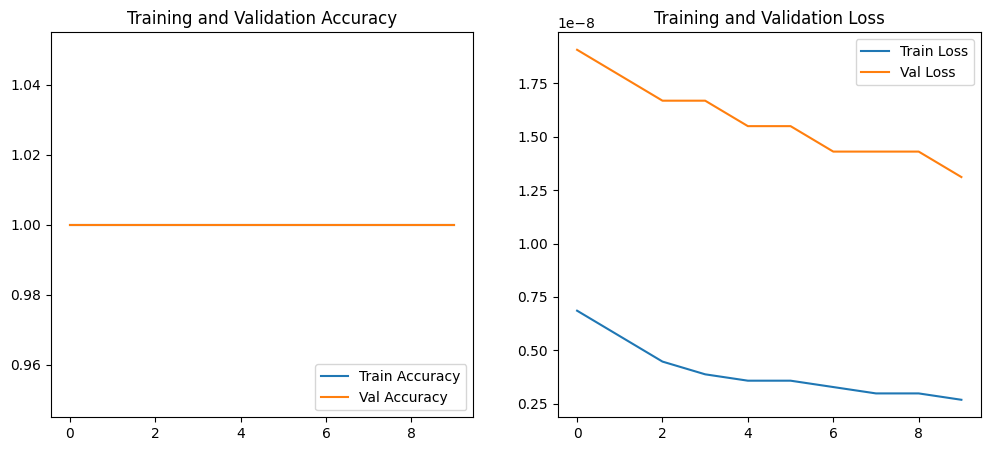

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


##Second Try

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/fruit_subset_100",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/fruit_subset_100",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 500 files belonging to 5 classes.
Using 400 files for training.
Found 500 files belonging to 5 classes.
Using 100 files for validation.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).prefetch(AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).prefetch(AUTOTUNE)


In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])


In [ ]:
model = tf.keras.Sequential([
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 fruit classes
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 1.0000 - loss: 1.0676e-04 - val_accuracy: 1.0000 - val_loss: 9.5751e-06
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 1.0000 - loss: 1.2049e-05 - val_accuracy: 1.0000 - val_loss: 2.2328e-06
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 1.3088e-06 - val_accuracy: 1.0000 - val_loss: 1.6153e-06
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 9.0743e-07 - val_accuracy: 1.0000 - val_loss: 8.1658e-07
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 1.0000 - loss: 5.7157e-07 - val_accuracy: 1.0000 - val_loss: 4.4465e-07
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 1.0000 - loss: 1.1683e-06 - val_accuracy: 1.0000 - val_loss: 2.0027e-07
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 2.9998e-07 - val_accuracy: 1.0000 - val_loss: 1.5497e-07
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 

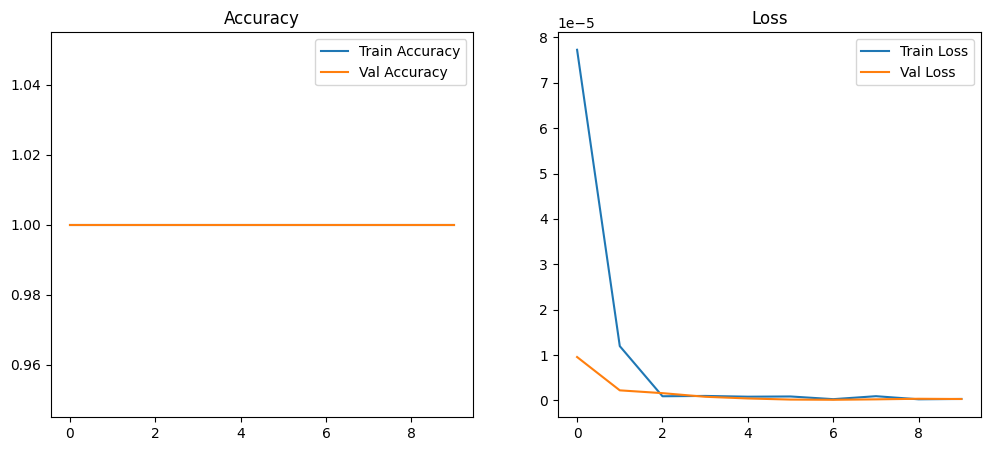

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


## ResNet50 as a Base Model

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
DATASET_PATH = "/content/fruit_subset_100"

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Normalize
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).prefetch(tf.data.AUTOTUNE)


Found 500 files belonging to 5 classes.
Using 400 files for training.
Found 500 files belonging to 5 classes.
Using 100 files for validation.


In [ ]:
base_model = tf.keras.applications.ResNet50(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze the pretrained part


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # Replace with your number of classes
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 90s 6s/step - accuracy: 0.2067 - loss: 1.7333 - val_accuracy: 0.3900 - val_loss: 1.5732
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 78s 6s/step - accuracy: 0.2533 - loss: 1.5773 - val_accuracy: 0.3600 - val_loss: 1.4201
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.5066 - loss: 1.4096 - val_accuracy: 0.3700 - val_loss: 1.3507
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 75s 6s/step - accuracy: 0.6270 - loss: 1.3074 - val_accuracy: 0.8500 - val_loss: 1.2080
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.8738 - loss: 1.2134 - val_accuracy: 0.9700 - val_loss: 1.1129
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 143s 7s/step - accuracy: 0.9508 - loss: 1.1049 - val_accuracy: 0.8500 - val_loss: 1.0260
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 135s 6s/step - accuracy: 0.8299 - loss: 1.0107 - val_accuracy: 0.7300 - val_loss: 0.9527
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 77s 6s/step - accuracy: 0.8655 - loss: 0.9398 - val_accuracy: 0.7100 - val_los

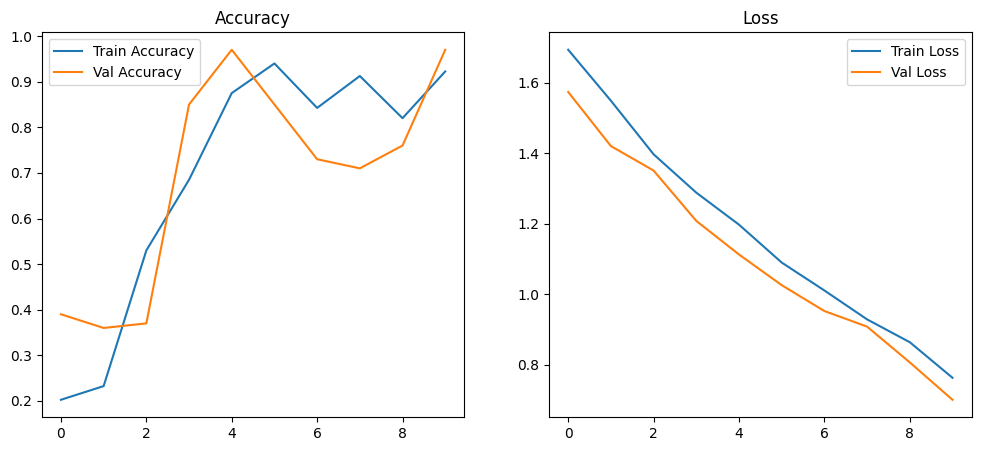

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


## **Base Model Conclusion**
While the custom CNN showed perfect training and validation accuracy, its performance likely resulted from overfitting or memorizing the small dataset. In contrast, ResNet50 demonstrated realistic learning curves. Between them, Model 2 showed consistent improvement, reaching 97% validation accuracy with a steadily decreasing loss. This makes Model 2 a more robust and generalizable baseline for further experimentation, such as data augmentation and fine-tuning

In [ ]:
model.save("resnet50_baseline.keras")